In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
data = pd.read_csv("/Users/niklashjort/Desktop/Projects/DeepLearnApi/DeepLearnApi/training/data/apple_data.csv")
print(data)
print(len(data))

        datetime       open       high        low      close     volume
0     2021-03-19  119.90000  121.43000  119.68000  119.99000  185023200
1     2021-03-18  122.88000  123.18000  120.32000  120.53000  121229700
2     2021-03-17  124.05000  125.86000  122.34000  124.76000  111437500
3     2021-03-16  125.70000  127.22000  124.72000  125.57000  114740000
4     2021-03-15  121.41000  124.00000  120.43000  123.99000   92590555
...          ...        ...        ...        ...        ...        ...
1811  2014-01-08   19.24321   19.48429   19.23893   19.40929  258529600
1812  2014-01-07   19.44000   19.49857   19.21143   19.28714  317209200
1813  2014-01-06   19.19464   19.52857   19.05714   19.42607  412610800
1814  2014-01-03   19.74500   19.77500   19.30107   19.32071  392467600
1815  2014-01-02   19.84571   19.89393   19.71500   19.75464  234684800

[1816 rows x 6 columns]
1816


In [40]:
dataFrame = pd.DataFrame(data[['datetime','close']])
dataframe_numpy = dataFrame.to_numpy()
dataframe_numpy = np.array(dataframe_numpy)
dataframe_numpy

array([['2021-03-19', 119.99],
       ['2021-03-18', 120.53],
       ['2021-03-17', 124.76],
       ...,
       ['2014-01-06', 19.426070000000003],
       ['2014-01-03', 19.320710000000002],
       ['2014-01-02', 19.75464]], dtype=object)

# Close and Date Correlation

In [41]:
x = [element for element in dataframe_numpy]
container_array = []
for element in x:
    datetime = element[0]
    close = element[1]
    container_array.append([datetime, close])
    
container_array

[['2021-03-19', 119.99],
 ['2021-03-18', 120.53],
 ['2021-03-17', 124.76],
 ['2021-03-16', 125.57],
 ['2021-03-15', 123.99],
 ['2021-03-12', 121.03],
 ['2021-03-11', 121.96],
 ['2021-03-10', 119.98],
 ['2021-03-09', 121.09],
 ['2021-03-08', 116.36],
 ['2021-03-05', 121.42],
 ['2021-03-04', 120.13],
 ['2021-03-03', 122.06],
 ['2021-03-02', 125.12],
 ['2021-03-01', 127.79],
 ['2021-02-26', 121.26],
 ['2021-02-25', 120.99],
 ['2021-02-24', 125.35],
 ['2021-02-23', 125.86],
 ['2021-02-22', 126.0],
 ['2021-02-19', 129.85001],
 ['2021-02-18', 129.71001],
 ['2021-02-17', 130.84],
 ['2021-02-16', 133.19],
 ['2021-02-12', 135.37],
 ['2021-02-11', 135.13],
 ['2021-02-10', 135.39],
 ['2021-02-09', 136.00999],
 ['2021-02-08', 136.91],
 ['2021-02-05', 136.75999],
 ['2021-02-04', 137.39],
 ['2021-02-03', 133.94],
 ['2021-02-02', 134.99001],
 ['2021-02-01', 134.14],
 ['2021-01-29', 131.96001],
 ['2021-01-28', 137.09],
 ['2021-01-27', 142.06],
 ['2021-01-26', 143.16],
 ['2021-01-25', 142.92],
 ['2021-

In [42]:
x = []
y = []
for element in container_array:
    x.append(element[0])
    y.append(element[1])
    
print(len(x))

1816


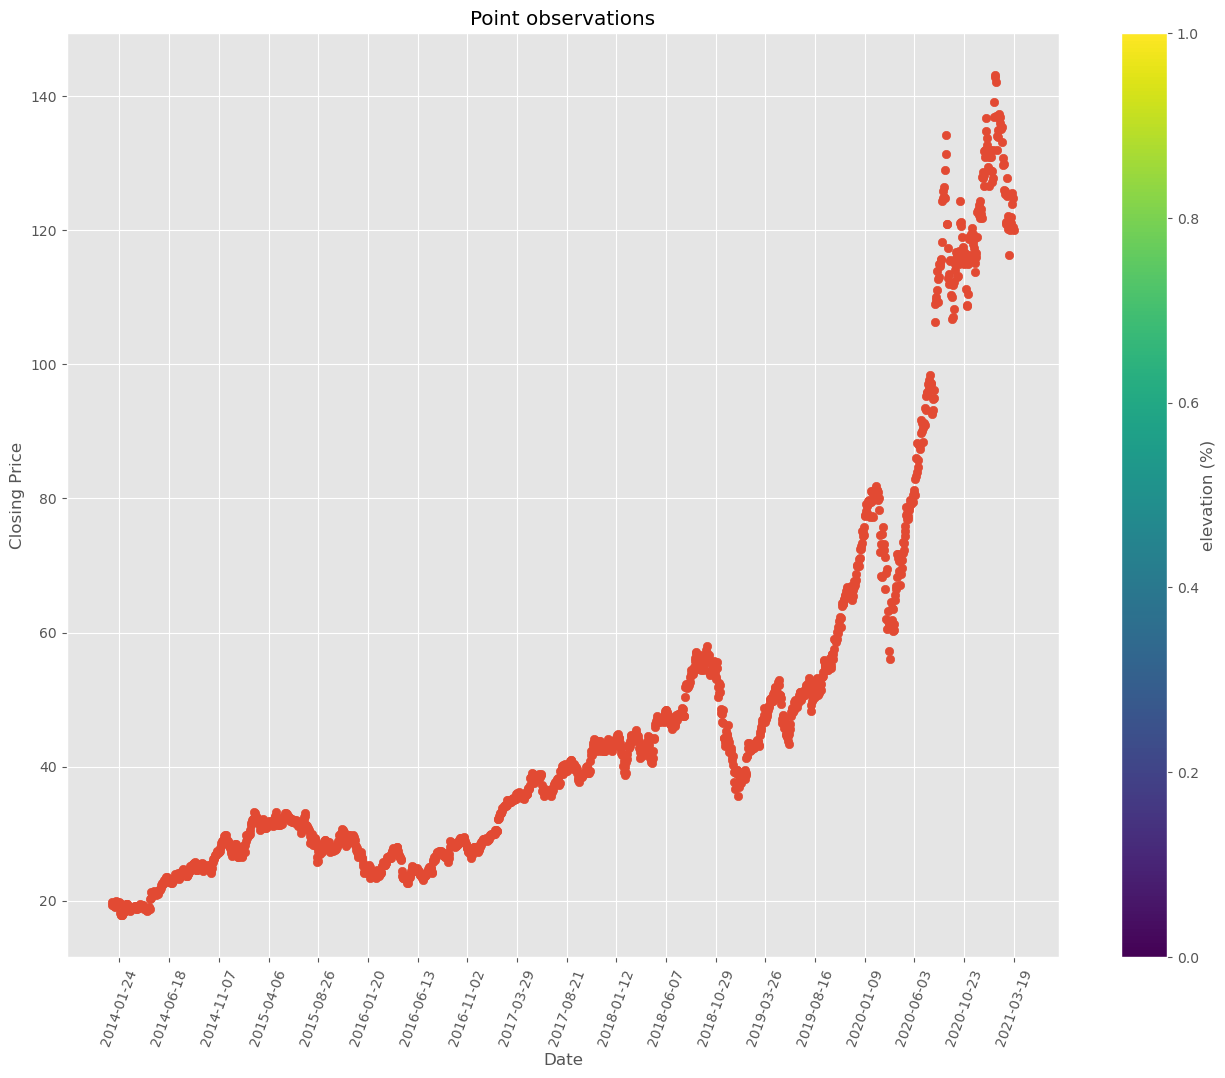

In [45]:
plt.figure(figsize=(16,12))

plt.scatter(x, y)

plt.title("Point observations")
plt.xlabel("Date")
plt.ylabel("Closing Price")
cbar= plt.colorbar()
cbar.set_label("elevation (%)", labelpad=+1)
plt.style.use("ggplot")
plt.xticks(np.arange(0, 1816, 100), rotation=70)
plt.gca().invert_xaxis()

plt.show()


In [2]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Medium Value

In [47]:
dataFrame = pd.DataFrame(data[['datetime', 'open', 'close']])
dataframe_numpy = dataFrame.to_numpy()
dataframe_numpy = np.array(dataframe_numpy)
dataframe_numpy


array([['2021-03-19', 119.9, 119.99],
       ['2021-03-18', 122.88, 120.53],
       ['2021-03-17', 124.05, 124.76],
       ...,
       ['2014-01-06', 19.19464, 19.426070000000003],
       ['2014-01-03', 19.745, 19.320710000000002],
       ['2014-01-02', 19.84571, 19.75464]], dtype=object)

In [48]:
element_list = [element for element in dataframe_numpy]
container_array = []
for element in element_list:
    datetime = element[0]
    
    # configure medium:
    medium_value = ((element[1] + element[2])/2)
    
    container_array.append([datetime, medium_value])
    
container_array

[['2021-03-19', 119.945],
 ['2021-03-18', 121.705],
 ['2021-03-17', 124.405],
 ['2021-03-16', 125.63499999999999],
 ['2021-03-15', 122.69999999999999],
 ['2021-03-12', 120.715],
 ['2021-03-11', 122.25],
 ['2021-03-10', 120.83500000000001],
 ['2021-03-09', 120.06],
 ['2021-03-08', 118.64500000000001],
 ['2021-03-05', 121.2],
 ['2021-03-04', 120.94],
 ['2021-03-03', 123.435],
 ['2021-03-02', 126.765],
 ['2021-03-01', 125.77000000000001],
 ['2021-02-26', 121.92500000000001],
 ['2021-02-25', 122.83500000000001],
 ['2021-02-24', 125.145],
 ['2021-02-23', 124.81],
 ['2021-02-22', 127.004995],
 ['2021-02-19', 130.02251],
 ['2021-02-18', 129.455005],
 ['2021-02-17', 131.04500000000002],
 ['2021-02-16', 134.34000500000002],
 ['2021-02-12', 134.860005],
 ['2021-02-11', 135.514995],
 ['2021-02-10', 135.935],
 ['2021-02-09', 136.314995],
 ['2021-02-08', 136.47],
 ['2021-02-05', 137.055],
 ['2021-02-04', 136.845],
 ['2021-02-03', 134.84999499999998],
 ['2021-02-02', 135.360005],
 ['2021-02-01', 133

In [49]:
x = []
y = []
for element in container_array:
    x.append(element[0])
    y.append(element[1])
print(len(y)) 
print(len(x))

1816
1816


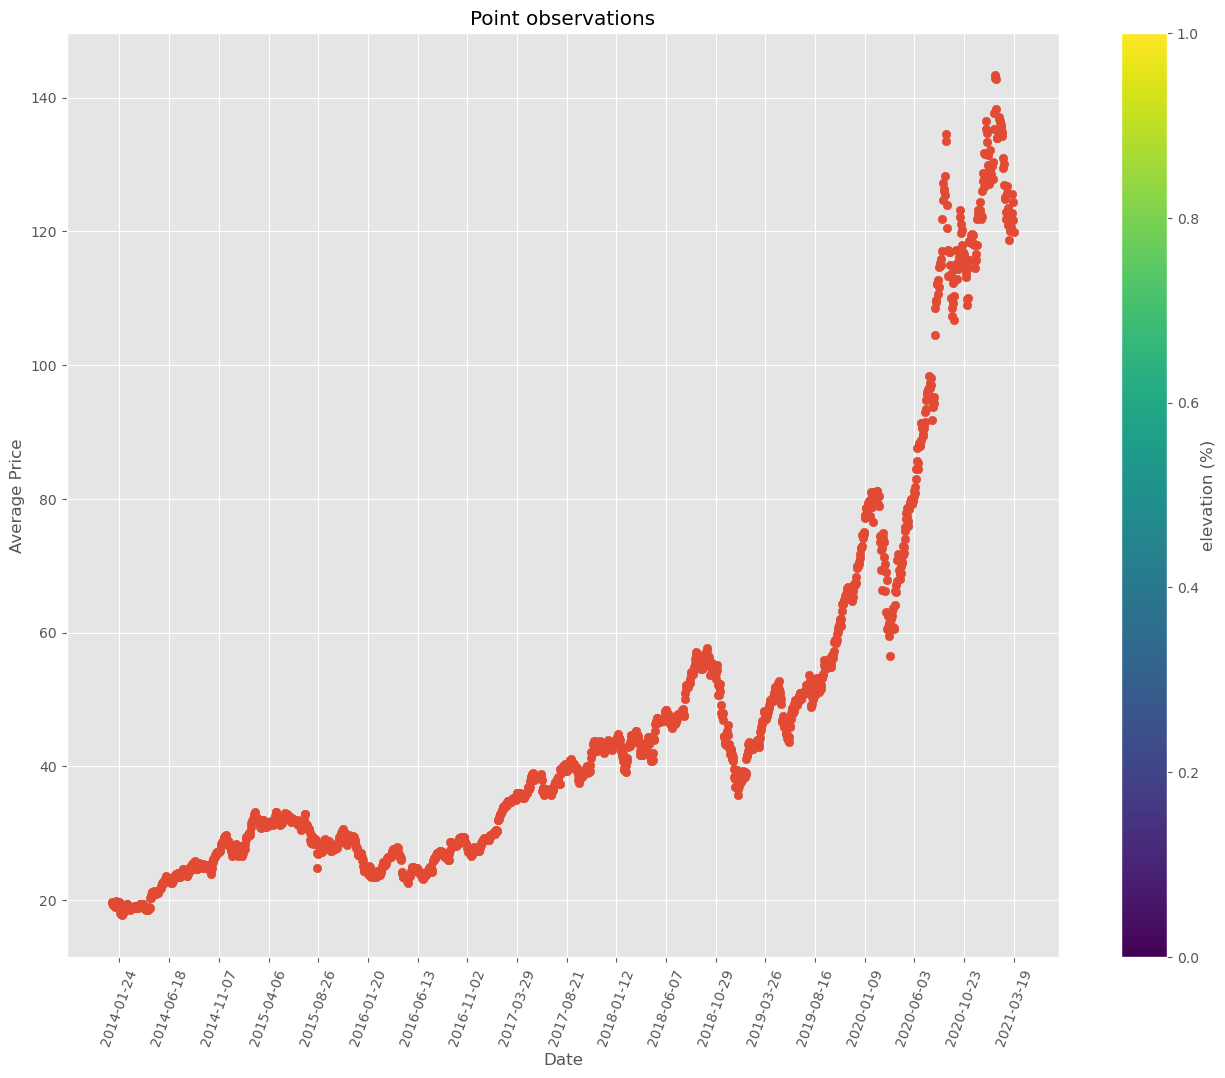

In [51]:
plt.figure(figsize=(16,12))

plt.scatter(x, y)


plt.title("Point observations")
plt.xlabel("Date")
plt.ylabel("Average Price")
cbar= plt.colorbar()
cbar.set_label("elevation (%)", labelpad=+1)
plt.style.use("ggplot")
plt.xticks(np.arange(0, 1816, 100), rotation=70)
plt.gca().invert_xaxis()

plt.show()

# Plotting All Values in dataframe


In [53]:
dataFrame = pd.DataFrame(data[['datetime', 'open', 'close', 'high', 'low']])
dataframe_numpy = dataFrame.to_numpy()
dataframe_numpy = np.array(dataframe_numpy)
dataframe_numpy

array([['2021-03-19', 119.9, 119.99, 121.43, 119.68],
       ['2021-03-18', 122.88, 120.53, 123.18, 120.32],
       ['2021-03-17', 124.05, 124.76, 125.86, 122.34],
       ...,
       ['2014-01-06', 19.19464, 19.426070000000003, 19.528570000000002,
        19.05714],
       ['2014-01-03', 19.745, 19.320710000000002, 19.775,
        19.301070000000003],
       ['2014-01-02', 19.84571, 19.75464, 19.893929999999997, 19.715]],
      dtype=object)

In [60]:
element_list = [element for element in dataframe_numpy]
container_array = []

for element in element_list:
    datetime = element[0]
    open_value = element[1]
    close_value = element[2]
    high_value = element[3]
    low_value = element[4]
    container_array.append([datetime, open_value, close_value, high_value, low_value])
    
container_array

[['2021-03-19', 119.9, 119.99, 121.43, 119.68],
 ['2021-03-18', 122.88, 120.53, 123.18, 120.32],
 ['2021-03-17', 124.05, 124.76, 125.86, 122.34],
 ['2021-03-16', 125.7, 125.57, 127.22, 124.72],
 ['2021-03-15', 121.41, 123.99, 124.0, 120.43],
 ['2021-03-12', 120.4, 121.03, 121.17, 119.16],
 ['2021-03-11', 122.54, 121.96, 123.21, 121.26],
 ['2021-03-10', 121.69, 119.98, 122.17, 119.45],
 ['2021-03-09', 119.03, 121.09, 122.06, 118.79],
 ['2021-03-08', 120.93, 116.36, 121.0, 116.21],
 ['2021-03-05', 120.98, 121.42, 121.94, 117.57],
 ['2021-03-04', 121.75, 120.13, 123.6, 118.62],
 ['2021-03-03', 124.81, 122.06, 125.71, 121.84],
 ['2021-03-02', 128.41, 125.12, 128.72, 125.01],
 ['2021-03-01', 123.75, 127.79, 127.93, 122.79],
 ['2021-02-26', 122.59, 121.26, 124.85, 121.2],
 ['2021-02-25', 124.68, 120.99, 126.46, 120.54],
 ['2021-02-24', 124.94, 125.35, 125.56, 122.23],
 ['2021-02-23', 123.76, 125.86, 126.71, 118.39],
 ['2021-02-22', 128.00999, 126.0, 129.72, 125.6],
 ['2021-02-19', 130.19501,

In [64]:
year_list = []
counter = 2014
for x in range(4):
    year_list.append(counter)
    counter += 2
year_list

[2014, 2016, 2018, 2020]

In [65]:

all_year = []
for year in year_list:
    year_period = []
    for element in container_array:
        if str(year) in element[0]:
            year_period.append(element)
    all_year.append(year_period)
print(len(all_year))
all_year

4


[[['2014-12-31', 28.205, 27.595, 28.2825, 27.5525],
  ['2014-12-30', 28.41, 28.13, 28.48, 28.0275],
  ['2014-12-29', 28.4475, 28.4775, 28.6925, 28.425],
  ['2014-12-26', 28.025, 28.4975, 28.63, 28.0025],
  ['2014-12-24', 28.145, 28.0025, 28.1775, 28.0025],
  ['2014-12-23', 28.3075, 28.135, 28.3325, 28.115],
  ['2014-12-22', 28.04, 28.235, 28.3725, 27.9925],
  ['2014-12-19', 28.065, 27.945, 28.31, 27.915],
  ['2014-12-18', 27.9675, 28.1625, 28.1625, 27.665],
  ['2014-12-17', 26.78, 27.3525, 27.46, 26.705],
  ['2014-12-16', 26.5925, 26.6875, 27.54, 26.565],
  ['2014-12-15', 27.675, 27.0575, 27.9, 26.5875],
  ['2014-12-12', 27.615, 27.4325, 27.9675, 27.395],
  ['2014-12-11', 28.065, 27.905, 28.45, 27.835],
  ['2014-12-10', 28.6025, 27.9875, 28.7125, 27.885],
  ['2014-12-09', 27.5475, 28.53, 28.575, 27.3375],
  ['2014-12-08', 28.525, 28.1, 28.6625, 27.905],
  ['2014-12-05', 28.9975, 28.75, 29.02, 28.66],
  ['2014-12-04', 28.9425, 28.8725, 29.3, 28.8225],
  ['2014-12-03', 28.9375, 28.9825, 

Text(0.5, 1.0, '2020')

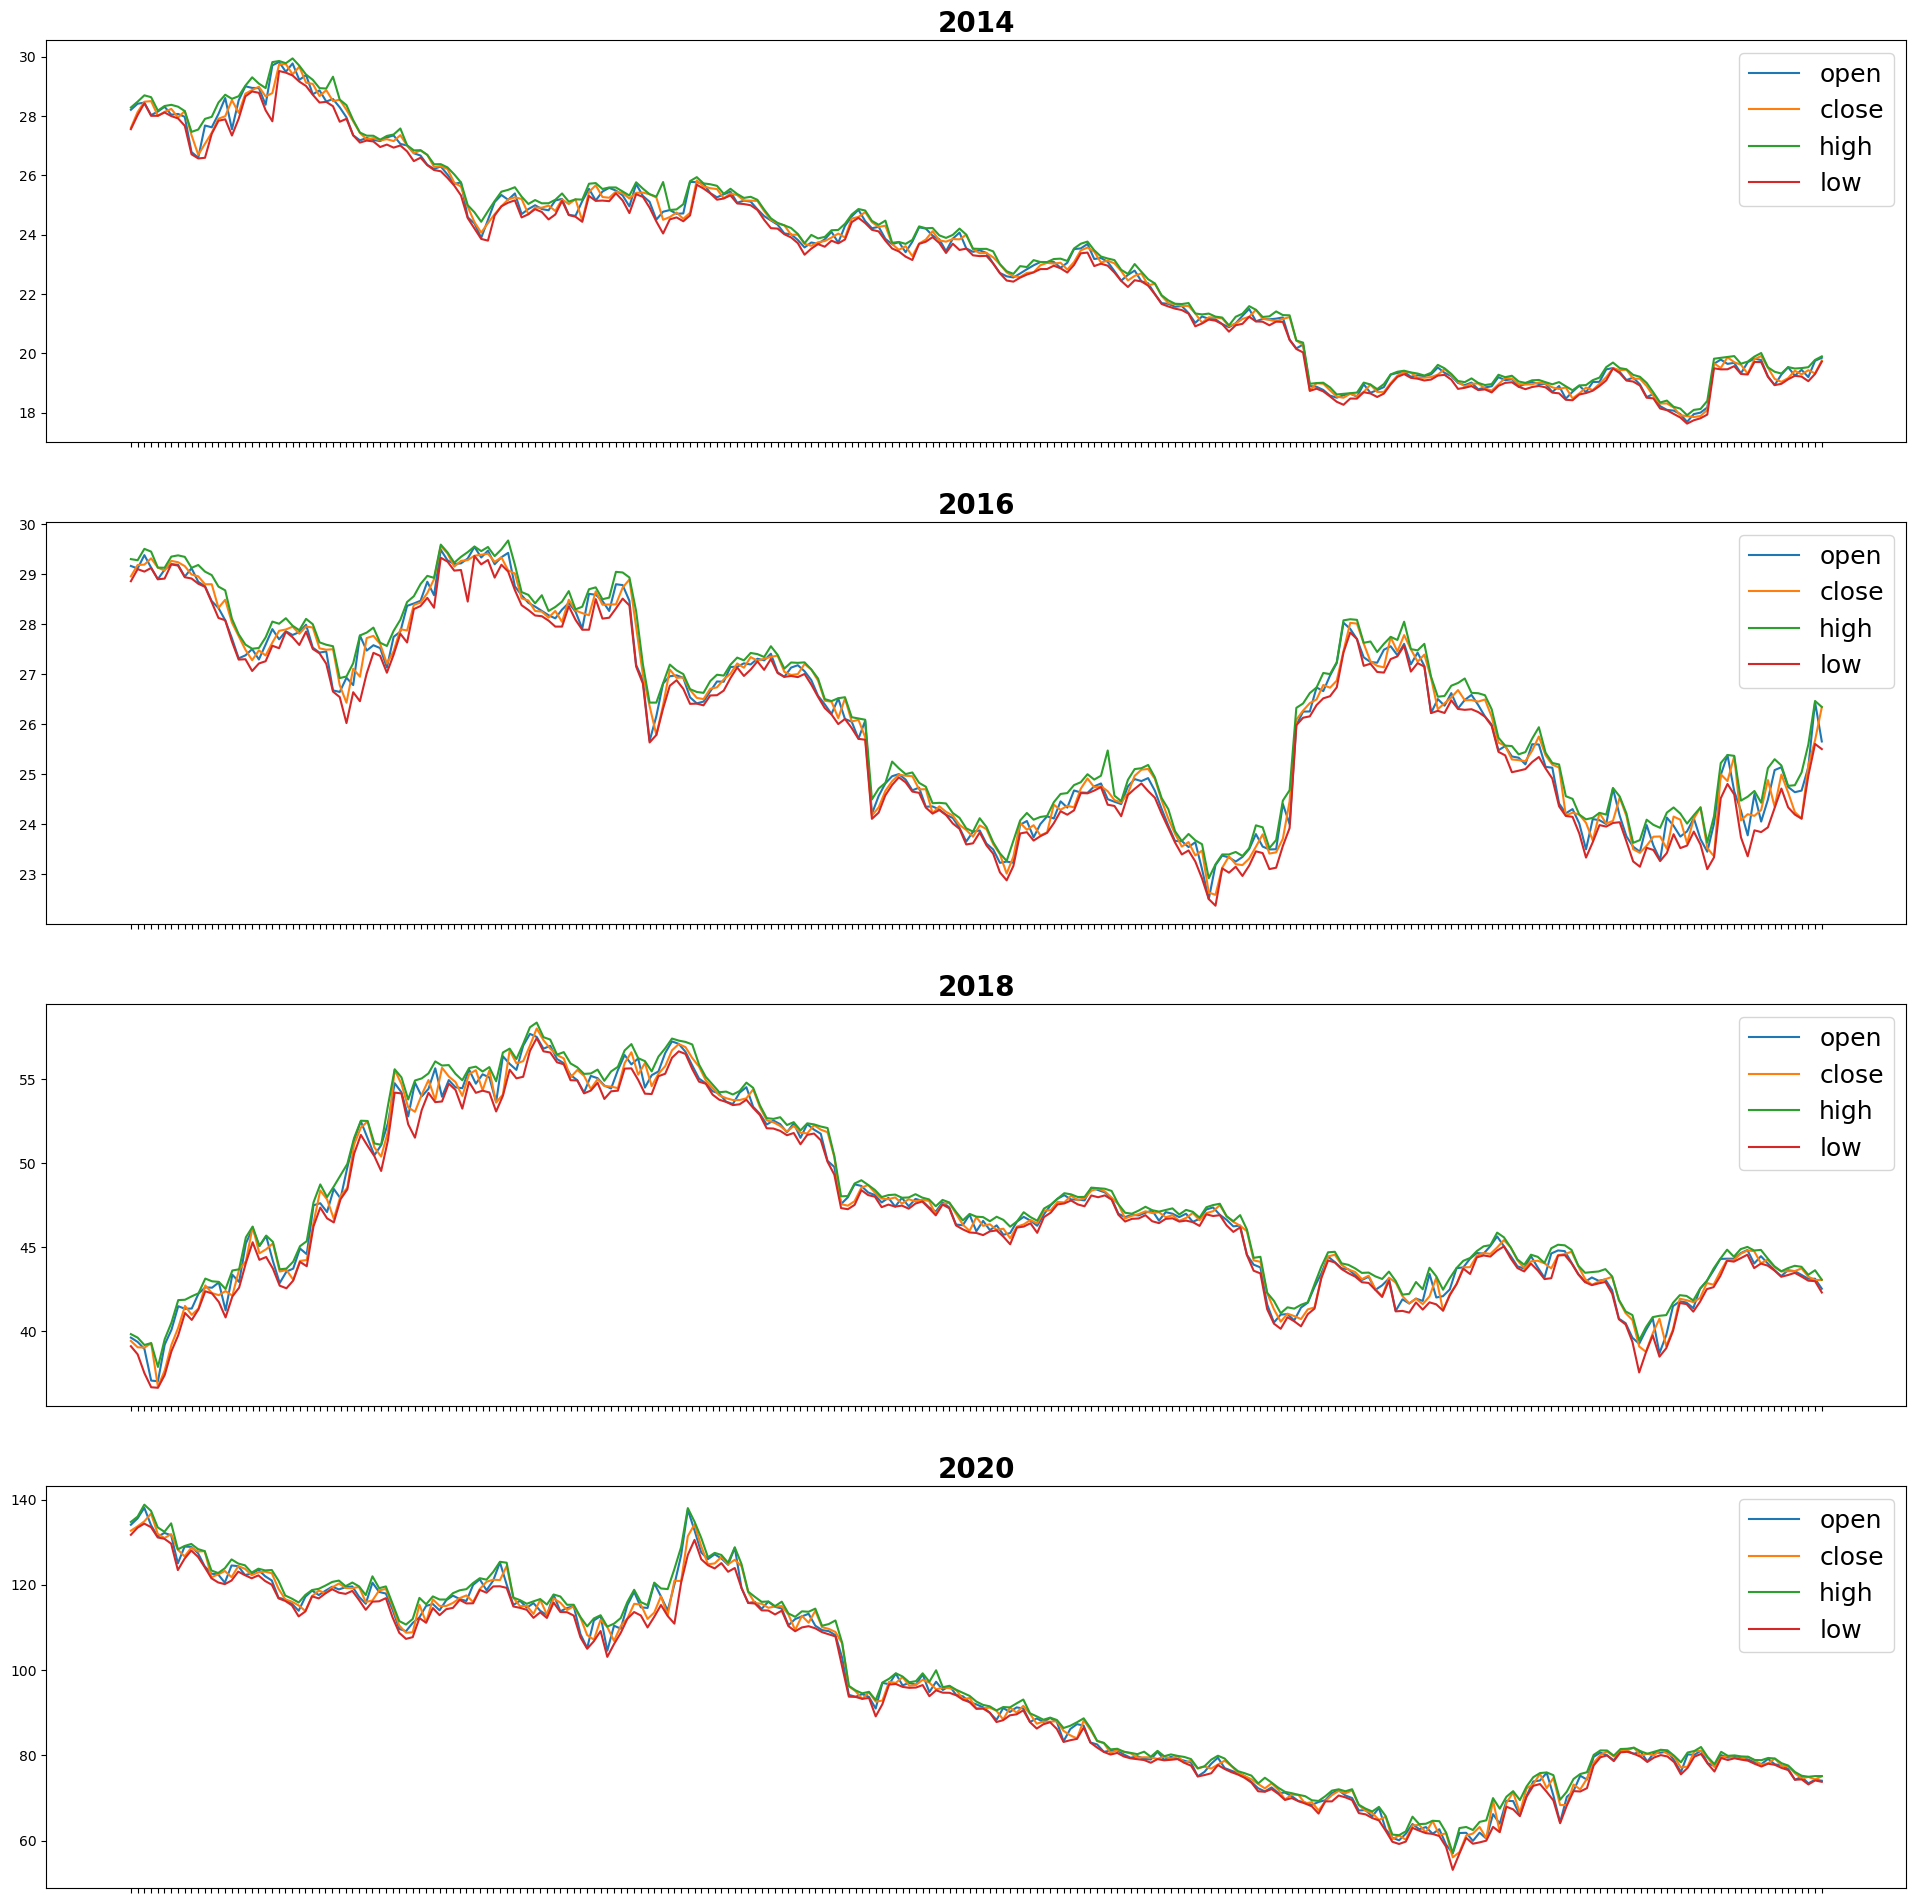

In [67]:
date = []
open_value = []
close_value = []
high_value = []
low_value = []


year_2010 = []
year_2013 = []
year_2016 = []
year_2019 = []


for lists in all_year:
    for single_list in lists:
        if str(2014) in single_list[0]:
            year_2010.append(single_list)
        if str(2016) in single_list[0]:
            year_2013.append(single_list)
        if str(2018) in single_list[0]:
            year_2016.append(single_list)
        if str(2020) in single_list[0]:
            year_2019.append(single_list)
      

# now we need all the values from each year...
plt.style.use("default")
f, axes =  plt.subplots(4, 1, figsize=(24, 24), sharex=False, sharey=False)


# 2010
date_2010 = []
open_value_2010 = []
close_value_2010 = []
high_value_2010 = []
low_value_2010= []

for element in year_2010:
    date_2010.append(element[0])
    open_value_2010.append(element[1])
    close_value_2010.append(element[2])
    high_value_2010.append(element[3])
    low_value_2010.append(element[4])


axes[0].plot(date_2010, open_value_2010, label="open")
axes[0].legend(loc="upper right")
axes[0].plot(date_2010, close_value_2010, label="close")
axes[0].plot(date_2010, high_value_2010, label="high")
axes[0].plot(date_2010, low_value_2010, label="low")
axes[0].legend(loc="upper right", prop=dict(size=18))
axes[0].set_xticklabels([])
axes[0].set_title('2014',fontweight="bold", size=20)


# 2013
date_2013 = []
open_value_2013 = []
close_value_2013 = []
high_value_2013 = []
low_value_2013= []

for element in year_2013:
    date_2013.append(element[0])
    open_value_2013.append(element[1])
    close_value_2013.append(element[2])
    high_value_2013.append(element[3])
    low_value_2013.append(element[4])

axes[1].plot(date_2013, open_value_2013, label="open")
axes[1].legend(loc="upper right")
axes[1].plot(date_2013, close_value_2013, label="close")
axes[1].plot(date_2013, high_value_2013, label="high")
axes[1].plot(date_2013, low_value_2013, label="low")
axes[1].legend(loc="upper right", prop=dict(size=18))
axes[1].set_xticklabels([])
axes[1].set_title('2016',fontweight="bold", size=20)

# 2016
date_2016 = []
open_value_2016 = []
close_value_2016 = []
high_value_2016 = []
low_value_2016= []

for element in year_2016:
    date_2016.append(element[0])
    open_value_2016.append(element[1])
    close_value_2016.append(element[2])
    high_value_2016.append(element[3])
    low_value_2016.append(element[4])


axes[2].plot(date_2016, open_value_2016, label="open")
axes[2].legend(loc="upper right")
axes[2].plot(date_2016, close_value_2016, label="close")
axes[2].plot(date_2016, high_value_2016, label="high")
axes[2].plot(date_2016, low_value_2016, label="low")
axes[2].legend(loc="upper right", prop=dict(size=18))
axes[2].set_xticklabels([])
axes[2].set_title('2018',fontweight="bold", size=20)

# 2019
date_2019 = []
open_value_2019 = []
close_value_2019 = []
high_value_2019 = []
low_value_2019 = []

for element in year_2019:
    date_2019.append(element[0])
    open_value_2019.append(element[1])
    close_value_2019.append(element[2])
    high_value_2019.append(element[3])
    low_value_2019.append(element[4])


axes[3].plot(date_2019, open_value_2019, label="open")
axes[3].legend(loc="upper right", prop=dict(size=18))
axes[3].plot(date_2019, close_value_2019, label="close")
axes[3].plot(date_2019, high_value_2019, label="high")
axes[3].plot(date_2019, low_value_2019, label="low")
axes[3].legend(loc="upper right", prop=dict(size=18))
axes[3].set_xticklabels([])
axes[3].set_title('2020',fontweight="bold", size=20)





# Creating an LTSM Model


We will have to use datetime as the index column also we will have to config the time since we dont need it.

In [15]:
data = pd.read_csv("/Users/niklashjort/Desktop/Projects/DeepLearnApi/DeepLearnApi/training/data/apple_data.csv")

In [16]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True, drop=True)

In [17]:
data.tail()
data.describe()

,open,high,low,close,volume
count,1816.000000,1816.000000,1816.000000,1816.000000,1.816000e+03
mean,46.996740,47.496860,46.492554,47.013724,1.582554e+08
std,28.407623,28.807218,27.931572,28.380392,8.832059e+07
min,17.685000,17.911790,17.626790,17.849290,2.221540e+07
25%,27.761875,28.049375,27.422500,27.776250,1.005045e+08
50%,38.470000,38.637500,38.162500,38.450000,1.347670e+08
75%,52.462500,52.973125,51.853750,52.328125,1.925661e+08
max,143.600010,145.080000,141.370000,143.160000,1.065523e+09


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1816 entries, 2021-03-19 to 2014-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1816 non-null   float64
 1   high    1816 non-null   float64
 2   low     1816 non-null   float64
 3   close   1816 non-null   float64
 4   volume  1816 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.1 KB


In [19]:
data.shape

(1816, 5)

In [20]:
last_five_years = 365*5
recent_data = data['volume']
recent_data = recent_data[:last_five_years]
print(recent_data.head())
recent_data.shape

datetime
2021-03-19    185023200
2021-03-18    121229700
2021-03-17    111437500
2021-03-16    114740000
2021-03-15     92590555
Name: volume, dtype: int64


(1816,)

<AxesSubplot:xlabel='datetime'>

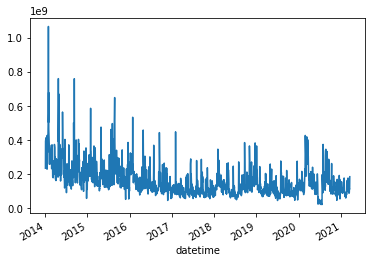

In [21]:
recent_data.plot()

The volume doesn't change significant. Lets plot the daily return

In [22]:
closing_price = data['close']
closing_diff = closing_price.pct_change()
closing_diff.head()

datetime
2021-03-19         NaN
2021-03-18    0.004500
2021-03-17    0.035095
2021-03-16    0.006492
2021-03-15   -0.012583
Name: close, dtype: float64

comparing apple to itself

/Users/niklashjort/opt/anaconda3/envs/AI_keras_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


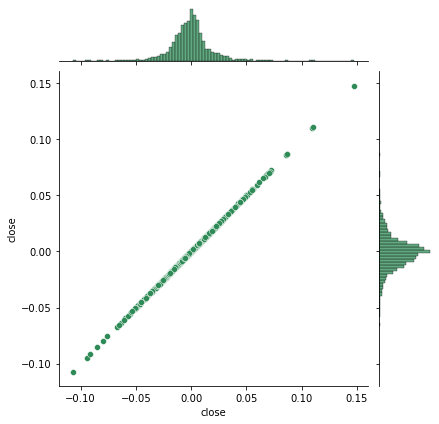

In [23]:
seaborn.jointplot(closing_diff, closing_diff, closing_diff, kind='scatter', color="seagreen")

In [24]:
closing_price = data.filter(['close'])
training_data = int(np.ceil(len(closing_price) * .95))
training_data
print(closing_price)

                close
datetime             
2021-03-19  119.99000
2021-03-18  120.53000
2021-03-17  124.76000
2021-03-16  125.57000
2021-03-15  123.99000
...               ...
2014-01-08   19.40929
2014-01-07   19.28714
2014-01-06   19.42607
2014-01-03   19.32071
2014-01-02   19.75464

[1816 rows x 1 columns]


In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price)
scaled_data

array([[0.8150996 ],
       [0.81940889],
       [0.85316498],
       ...,
       [0.01258296],
       [0.01174217],
       [0.01520501]])

In [26]:
train_data = scaled_data[0:int(training_data),:]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.8150996 , 0.81940889, 0.85316498, 0.85962892, 0.84702026,
       0.82339897, 0.83082053, 0.8150198 , 0.82387778, 0.78613161,
       0.82651124, 0.81621683, 0.83161854, 0.85603784, 0.87734488,
       0.82523441, 0.82307977, 0.85787328, 0.86194317, 0.86306039,
       0.8937841 , 0.89266688, 0.90168438, 0.92043777, 0.93783452,
       0.93591928, 0.93799413, 0.94294175, 0.95012398, 0.94892687,
       0.95395445, 0.92642289, 0.93480214, 0.92801892, 0.91062224,
       0.95156041, 0.99122182, 1.        , 0.99808476, 0.96736121,
       0.94980477, 0.91118078, 0.87766409, 0.87215777, 0.88628266,
       0.90208339, 0.88540485, 0.88684128, 0.91134038, 0.90232279,
       0.86784849, 0.90304093, 0.89027275, 0.91644768, 0.92466725,
       0.93384444, 0.94836834, 0.91070197, 0.90264208, 0.90998375])]
[0.8808561534764265]

[array([0.8150996 , 0.81940889, 0.85316498, 0.85962892, 0.84702026,
       0.82339897, 0.83082053, 0.8150198 , 0.82387778, 0.78613161,
       0.82651124, 0.81621683, 0.831

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1666/1666 [==============================] - 244s 146ms/step - loss: 0.0017


In [30]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[1666:]
# Create the data sets x_test and y_test
x_test = []
y_test = closing_price[training_data::]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

close    1.093279
dtype: float64

In [42]:
valid = scaled_data[training_data:,:]
valid


array([[0.02651976],
       [0.02444204],
       [0.02514031],
       [0.02637723],
       [0.02697008],
       [0.02883688],
       [0.0264485 ],
       [0.02613504],
       [0.02573882],
       [0.02637723],
       [0.02687887],
       [0.020566  ],
       [0.01937751],
       [0.00711655],
       [0.00909739],
       [0.00894632],
       [0.00717074],
       [0.00548062],
       [0.00518136],
       [0.00624161],
       [0.00565163],
       [0.00675457],
       [0.00870404],
       [0.00674324],
       [0.00675178],
       [0.00913154],
       [0.01111804],
       [0.0121897 ],
       [0.01193314],
       [0.01053374],
       [0.01056797],
       [0.01073899],
       [0.01140022],
       [0.01288509],
       [0.01123208],
       [0.0094308 ],
       [0.00824231],
       [0.00897194],
       [0.00901184],
       [0.0076837 ],
       [0.00709947],
       [0.00879813],
       [0.01049671],
       [0.01034852],
       [0.00887506],
       [0.00873828],
       [0.00882662],
       [0.009

In [43]:
train = closing_price[:training_data]
valid = scaled_data[training_data:,:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [68]:

valid

,close,Predictions
datetime,,
2014-05-12,21.17250,22.497061
2014-05-09,20.91214,22.426039
2014-05-08,20.99964,22.349312
2014-05-07,21.15464,22.284338
2014-05-06,21.22893,22.247208
...,...,...
2014-01-08,19.40929,20.672134
2014-01-07,19.28714,20.626055
2014-01-06,19.42607,20.591969
